K-Nearest Neighbors is an algorithm for supervised learning. Where the data is 'trained' with data points corresponding to their classification. Once a point is to be predicted, it takes into account the 'K' nearest points to it to determine it's classification.

In [4]:
#fit and predict a data point
import itertools
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing

In [5]:
df = pd.read_csv('iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


 Data Visualization

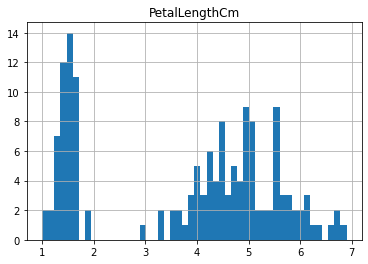

In [6]:
df.hist(column='PetalLengthCm', bins=50);

Feature Extraction 

In [10]:
#features are columns X-->features, independant, inputs
X = df[['Id','SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] .values

Label Extraction

In [11]:
y = df['Species'].values #y is the OUTPUT, what kind of flower is it?? it's dependant.

Data Normalization

In [12]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

Train Test Split

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

sClassification Algorithm: K nearest neighbor (K-NN)

In [15]:
from sklearn.neighbors import KNeighborsClassifier #import the library

Training, put k=4

In [16]:
k = 4
classifier = KNeighborsClassifier(n_neighbors = k)
#Train Model and Predict  
model = classifier.fit(X_train,y_train)

Predicting
We can use the model to predict the test set

In [17]:
yhat = model.predict(X_test)

Accuracy evaluation

In [18]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.9916666666666667
Test set Accuracy:  1.0


Which K is best ?

In [19]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

Plot model accuracy for different K

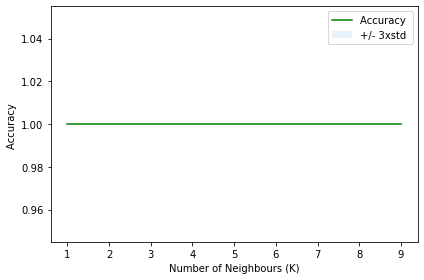

In [20]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbours (K)')
plt.tight_layout()
plt.show()

In [21]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 1.0 with k= 1


In [ ]:
#all values had 1, not a good model !!!! but helps u understand how the code works